In [76]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [77]:
df = pd.read_excel("data.xls")


In [78]:
# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'], unit='ms')


df = df[['time','pm25']]
df.isnull().sum()

time    0
pm25    0
dtype: int64

In [79]:
df.describe



<bound method NDFrame.describe of                     time  pm25
0    2019-07-01 18:30:26    19
1    2019-07-01 18:31:26    15
2    2019-07-01 18:32:26    13
3    2019-07-01 18:33:27    15
4    2019-07-01 18:34:27    15
...                  ...   ...
8191 2019-07-07 11:52:42    14
8192 2019-07-07 11:53:42    14
8193 2019-07-07 11:54:42    15
8194 2019-07-07 11:56:25    13
8195 2019-07-07 11:56:42    13

[8196 rows x 2 columns]>

In [80]:
test1=df[7500:]
test_xcoord = test1['time'].dt.time.to_numpy()
test_xcoord

array([datetime.time(0, 14, 34), datetime.time(0, 15, 34),
       datetime.time(0, 16, 34), datetime.time(0, 17, 34),
       datetime.time(0, 18, 34), datetime.time(0, 19, 34),
       datetime.time(0, 20, 34), datetime.time(0, 21, 34),
       datetime.time(0, 22, 34), datetime.time(0, 23, 34),
       datetime.time(0, 24, 33), datetime.time(0, 25, 33),
       datetime.time(0, 26, 33), datetime.time(0, 27, 33),
       datetime.time(0, 28, 33), datetime.time(0, 29, 33),
       datetime.time(0, 30, 33), datetime.time(0, 31, 33),
       datetime.time(0, 32, 33), datetime.time(0, 33, 33),
       datetime.time(0, 34, 33), datetime.time(0, 35, 33),
       datetime.time(0, 36, 33), datetime.time(0, 37, 33),
       datetime.time(0, 38, 33), datetime.time(0, 39, 33),
       datetime.time(0, 40, 33), datetime.time(0, 41, 33),
       datetime.time(0, 42, 33), datetime.time(0, 43, 33),
       datetime.time(0, 44, 33), datetime.time(0, 45, 33),
       datetime.time(0, 46, 33), datetime.time(0, 47, 33

In [81]:
#df = df.groupby('time')['pm25'].mean().reset_index()
df = df.set_index('time')
df = df.resample('1H').mean()
df.index
df.describe()

,pm25
count,138.000000
mean,18.444800
std,5.073158
min,10.131148
25%,14.510724
50%,17.891323
75%,21.458333
max,33.466667


In [82]:
train=df[0:126] 
test=df[126:]
train.head()


,pm25
time,
2019-07-01 18:00:00,13.100000
2019-07-01 19:00:00,10.540984
2019-07-01 20:00:00,11.916667
2019-07-01 21:00:00,13.416667
2019-07-01 22:00:00,16.295082


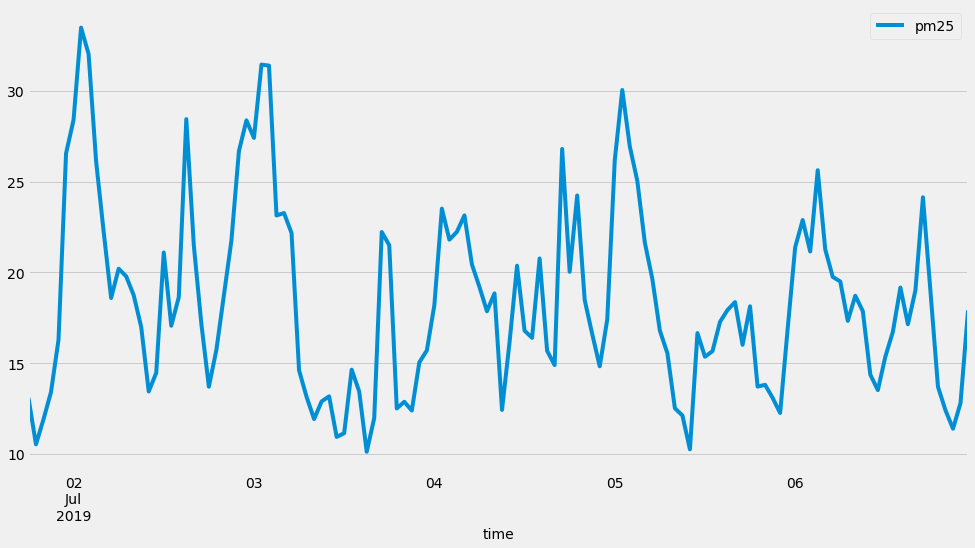

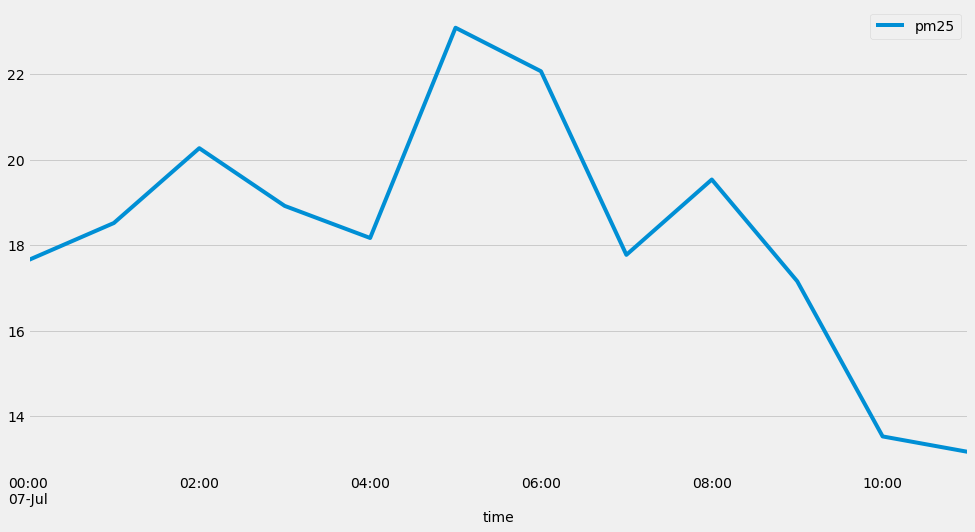

In [83]:
train.plot(figsize=(15,8), fontsize=14)
test.plot(figsize=(15,8), fontsize=14)
plt.show()


In [84]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



training_set = train.iloc[:].values
training_set

array([[13.1       ],
       [10.54098361],
       [11.91666667],
       [13.41666667],
       [16.29508197],
       [26.54237288],
       [28.39285714],
       [33.46666667],
       [32.01694915],
       [26.11666667],
       [22.26229508],
       [18.59322034],
       [20.20338983],
       [19.78688525],
       [18.74576271],
       [17.        ],
       [13.45      ],
       [14.47540984],
       [21.09836066],
       [17.06557377],
       [18.63793103],
       [28.43333333],
       [21.48333333],
       [17.18333333],
       [13.71186441],
       [15.73333333],
       [18.73770492],
       [21.75      ],
       [26.67213115],
       [28.36666667],
       [27.4       ],
       [31.43333333],
       [31.37704918],
       [23.13333333],
       [23.26666667],
       [22.16666667],
       [14.61666667],
       [13.15254237],
       [11.93220339],
       [12.90163934],
       [13.18333333],
       [10.95      ],
       [11.15254237],
       [14.65      ],
       [13.45      ],
       [10

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 126):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units =  150, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)





Epoch 1/100
66/66 [==============================] - 6s 96ms/step - loss: 0.1068
Epoch 2/100
66/66 [==============================] - 2s 23ms/step - loss: 0.1369
Epoch 3/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0715
Epoch 4/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0788
Epoch 5/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0633
Epoch 6/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0373
Epoch 7/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0429
Epoch 8/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0340
Epoch 9/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0378
Epoch 10/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0456
Epoch 11/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0407
Epoch 12/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0339
Epoch 13/100
66/66 [=====

In [ ]:

real_stock_price = test.iloc[:].values


dataset_total = pd.concat((train['pm25'], test['pm25']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 72):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(real_stock_price, color = 'red', label = 'Real pm25 values')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted pm25 values')
plt.title('Time Series Prediction')
plt.xlabel('(Date-07-07-2019)  Time')
plt.ylabel('pm25 values(ug/m3)')
plt.legend()
plt.show()

mse = ((predicted_stock_price - real_stock_price) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
predicted_stock_price